In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
file_path = 'BRFSS_2023_Prevalence_Data.csv'  # Replace with the actual path if needed
df = pd.read_csv(file_path)

In [17]:
print(df.head())

   Year Locationabbr Locationdesc         Class    Topic  \
0  2023           AL      Alabama  Demographics      Age   
1  2023           AL      Alabama  Demographics      Age   
2  2023           AL      Alabama  Demographics  Hearing   
3  2023           AK       Alaska  Demographics      Age   
4  2023           AK       Alaska  Demographics      Age   

                         Question     Response  Break_Out Break_Out_Category  \
0               What is your age?  55-64 years       Male             Gender   
1               What is your age?    65+ years       Male             Gender   
2  Adults who reported being deaf          Yes        65+          Age Group   
3               What is your age?  35-44 years  $200,000+   Household Income   
4               What is your age?  45-54 years  $200,000+   Household Income   

  Sample_Size  ...  Data_Value_Footnote  DataSource  ClassId  TopicId  \
0         340  ...                  NaN       BRFSS  CLASS05  TOPIC02   
1         66

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        5999 non-null   int64  
 1   Locationabbr                5999 non-null   object 
 2   Locationdesc                5999 non-null   object 
 3   Class                       5999 non-null   object 
 4   Topic                       5998 non-null   object 
 5   Question                    5999 non-null   object 
 6   Response                    5966 non-null   object 
 7   Break_Out                   5999 non-null   object 
 8   Break_Out_Category          5999 non-null   object 
 9   Sample_Size                 5999 non-null   object 
 10  Data_value                  4622 non-null   float64
 11  Confidence_limit_Low        4622 non-null   float64
 12  Confidence_limit_High       4622 non-null   float64
 13  Display_order               5999 

In [19]:
print(df[['Sample_Size', 'Data_value']].describe())

        Data_value
count  4622.000000
mean     40.359303
std      32.304509
min       0.600000
25%      11.500000
50%      29.700000
75%      69.575000
max     100.000000


In [21]:
print(df.isnull().sum())

Year                             0
Locationabbr                     0
Locationdesc                     0
Class                            0
Topic                            1
Question                         0
Response                        33
Break_Out                        0
Break_Out_Category               0
Sample_Size                      0
Data_value                    1377
Confidence_limit_Low          1377
Confidence_limit_High         1377
Display_order                    0
Data_value_unit                  0
Data_value_type                  0
Data_Value_Footnote_Symbol    4622
Data_Value_Footnote           4622
DataSource                       0
ClassId                          0
TopicId                          0
LocationID                       0
BreakoutID                       0
BreakOutCategoryID               0
QuestionID                       0
ResponseID                       0
GeoLocation                      0
dtype: int64


In [23]:
df_cleaned = df.dropna(subset=['Data_value', 'Sample_Size'])

In [33]:
df_cleaned['Sample_Size'] = pd.to_numeric(df_cleaned['Sample_Size'].str.replace(',', ''), errors='coerce')

<ipython-input-33-dd262bb2443b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sample_Size'] = pd.to_numeric(df_cleaned['Sample_Size'].str.replace(',', ''), errors='coerce')


In [34]:
categorical_columns = ['Locationdesc', 'Class', 'Topic', 'Break_Out_Category']
for column in categorical_columns:
    print(f"\nValue Counts for {column}:")
    print(df_cleaned[column].value_counts())


Value Counts for Locationdesc:
Locationdesc
Alabama        2863
Alaska          766
Colorado        511
Arizona         455
California        9
Connecticut       8
Delaware          3
Arkansas          2
Florida           2
Idaho             2
Georgia           1
Name: count, dtype: int64

Value Counts for Class:
Class
Demographics                    1826
Health Care Access/Coverage      616
Chronic Health Indicators        576
E-Cigarette Use                  255
Health Status                    225
Days of Poor Health              224
Physical Activity                217
Alcohol Consumption              139
Overweight and Obesity (BMI)     134
Cholesterol Awareness            107
HIV-AIDS                         103
Injury                            73
Immunization                      68
Hypertension Awareness            48
Tobacco Use                       11
Name: count, dtype: int64

Value Counts for Topic:
Topic
Disability status          469
E-Cigarette Use            255
Race

In [35]:
print(df_cleaned[['Sample_Size', 'Data_value']].describe())

        Sample_Size   Data_value
count   4622.000000  4622.000000
mean     517.593250    40.359303
std      887.079928    32.304509
min       11.000000     0.600000
25%       68.000000    11.500000
50%      189.000000    29.700000
75%      566.000000    69.575000
max    11162.000000   100.000000


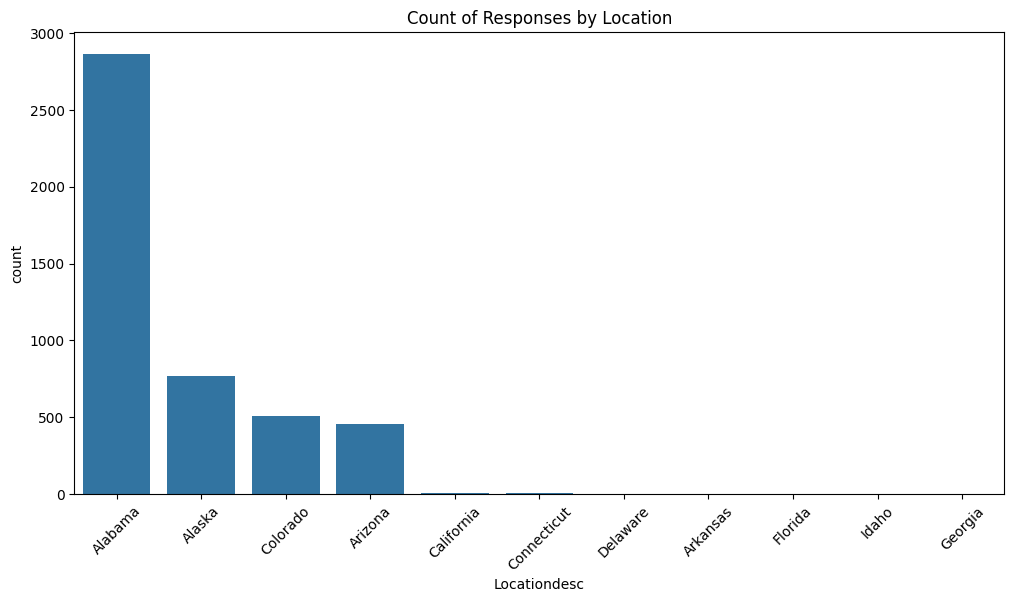

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Locationdesc', order=df_cleaned['Locationdesc'].value_counts().index)
plt.title('Count of Responses by Location')
plt.xticks(rotation=45)
plt.show()

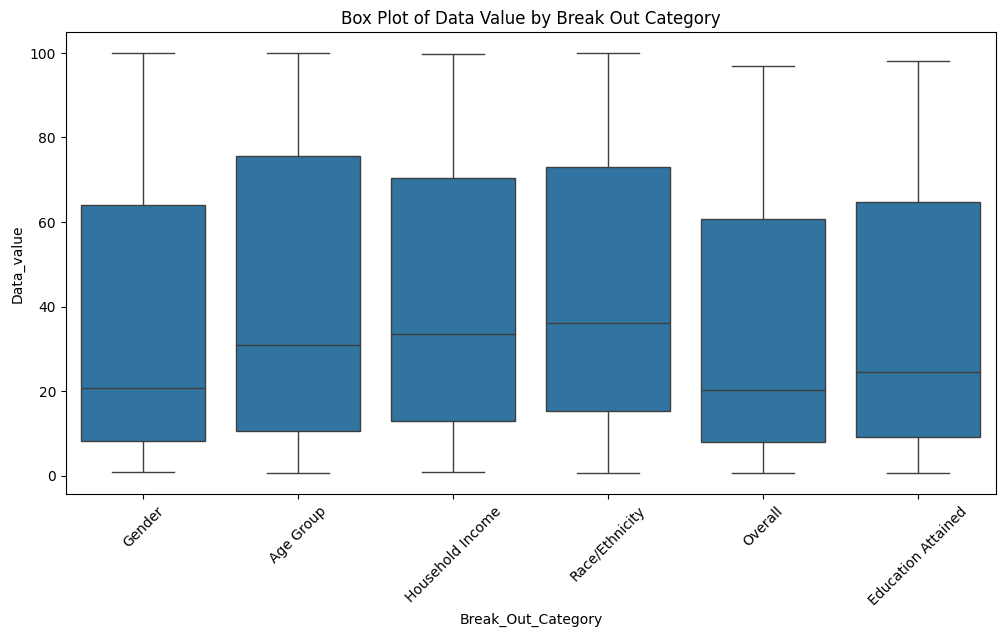

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Break_Out_Category', y='Data_value')
plt.title('Box Plot of Data Value by Break Out Category')
plt.xticks(rotation=45)
plt.show()

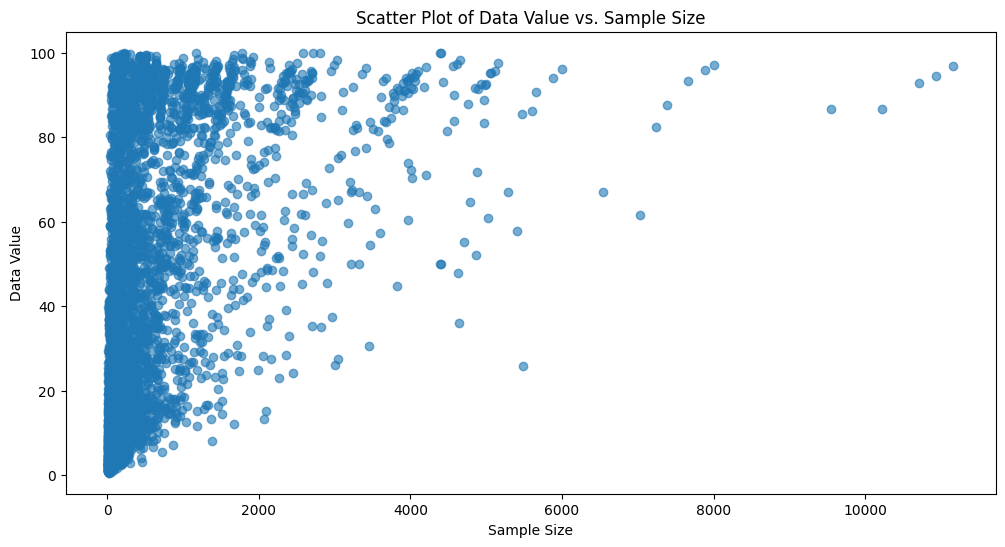

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned['Sample_Size'], df_cleaned['Data_value'], alpha=0.6)
plt.xlabel('Sample Size')
plt.ylabel('Data Value')
plt.title('Scatter Plot of Data Value vs. Sample Size')
plt.show()

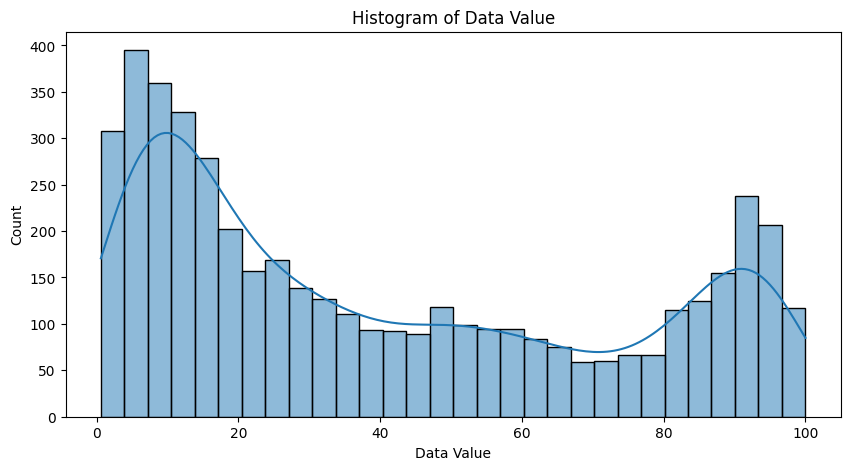

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Data_value'], bins=30, kde=True)
plt.title('Histogram of Data Value')
plt.xlabel('Data Value')
plt.show()


Correlation Matrix:
             Sample_Size  Data_value
Sample_Size     1.000000    0.460331
Data_value      0.460331    1.000000


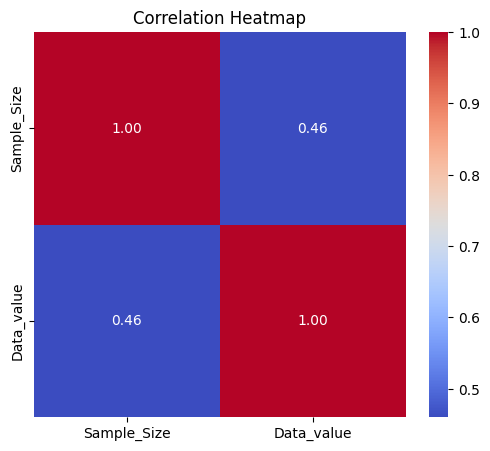

In [40]:
correlation_matrix = df_cleaned[['Sample_Size', 'Data_value']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()